In [5]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
N = 1000
K = 500

def fisher_information(theta):
    return 1 / (theta * (1 - theta))

def cramer_rao_lower_bound(theta):
    return 1 / (N * fisher_information(theta))


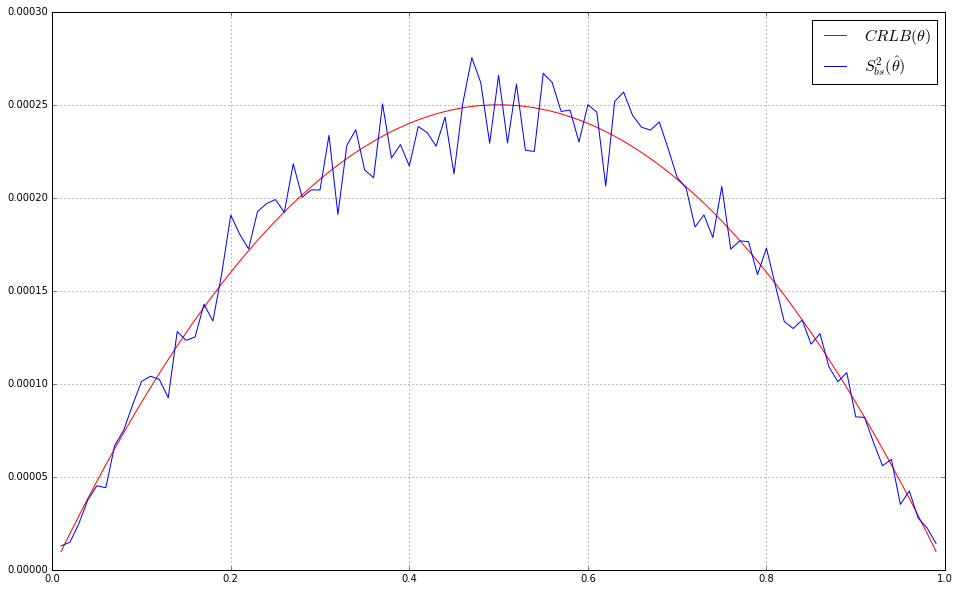

In [7]:
theta_grid = np.arange(0.01, 1, 0.01)
crlb_range = [cramer_rao_lower_bound(theta) for theta in theta_grid]

bootstrap_estimation_range = []
for theta in theta_grid:
    sample = sps.bernoulli.rvs(theta, size=N)
    efficient_estimation = sample.mean()
    bootstrap_samples = [sps.bernoulli.rvs(efficient_estimation, size=N)
                         for k in range(K)]
    bootstrap_estimations = [s.mean() for s in bootstrap_samples]
    bootstrap_estimation_range.append(np.var(bootstrap_estimations))

plt.figure(figsize=(16, 10))
plt.ylim(0, 0.0003)
plt.plot(theta_grid, crlb_range, color='red', label=r'$CRLB(\theta)$')
plt.plot(theta_grid, bootstrap_estimation_range, color='blue', 
         label=r'$S^{2}_{bs}(\^{\theta})$')
plt.grid()
plt.legend(fontsize=16)
plt.show()

In [ ]:
# Среднее отклонение от ожидаемой величины достаточно мало